# 💰 Expense Categorization using Machine Learning
This notebook demonstrates how to build a **hybrid machine learning model** for classifying daily expenses 
using the **Daily Transactions Dataset** from Kaggle.

### 🔑 Key Objectives
1. Load and preprocess the dataset.  
2. Extract useful features from text (`Note/Product`) and numeric (`Amount`, `Date`).  
3. Train a hybrid ML pipeline using `TF-IDF + Numeric Features`.  
4. Evaluate model performance.  
5. Save the trained model for integration into a frontend/backend application. 

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


## 📂 Step 1: Load the Dataset
We are using the **Daily Transactions Dataset** from Kaggle.  
It contains details such as:
- Product/Note  
- Amount  
- Date of transaction  
- Category & Subcategory  

These features will be used to train our expense categorization model.  

In [5]:
# Load the dataset (update path if needed)
df = pd.read_csv("exp.csv")

# Display first few rows
df.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


## 🛠️ Step 2: Data Preprocessing
We will:
1. Clean and normalize text (Notes/Product names).
2. Extract date-related features like `day_of_week` and `month`.
3. Encode the target variable (Expense Category).


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract features from Date
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Drop rows with missing target (if any)
df = df.dropna(subset=['Category'])

# Show processed data
df.head()


/tmp/ipykernel_63242/2190267759.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,DayOfWeek,Month
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,3.0,9.0
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,3.0,9.0
2,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR,NaN,NaN
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,0.0,9.0
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,6.0,9.0


## 🎯 Step 3: Feature Selection
We will use the following features:
- **Text Feature:** `Note` (description of transaction)  
- **Numeric Features:** `Amount`, `DayOfWeek`, `Month`  
- **Target Variable:** `Category`  


In [7]:
# Define features and target
X = df[['Note', 'Amount', 'DayOfWeek', 'Month']]
y = df['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Step 4: Build Machine Learning Pipeline
We will create a **ColumnTransformer**:
- `TfidfVectorizer` for text (`Note`)  
- `StandardScaler` for numeric features (`Amount`, `DayOfWeek`, `Month`)  

Classifier: Logistic Regression (can be replaced with RandomForest, SVM, etc.).  


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        # Text: replace missing with "missing" and one-hot encode
        ('text', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['Note']),
        
        # Numeric: replace missing with median, then scale
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Amount', 'DayOfWeek', 'Month'])
    ]
)

# -------------------------------
# 5. Pipeline
# -------------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# -------------------------------
# 6. Train
# -------------------------------
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Note']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Amount', 'DayOfWeek',
                                                   'Month'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## 📊 Step 5: Model Evaluation
We will check:
- Classification Report (Precision, Recall, F1-Score)  
- Confusion Matrix  


/home/ravi/SmartSpend/my_project_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ravi/SmartSpend/my_project_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ravi/SmartSpend/my_project_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

                           precision    recall  f1-score   support

                  Apparel       1.00      0.14      0.25         7
                   Beauty       1.00      0.33      0.50         6
                    Bonus       1.00      0.50      0.67         2
                     Cook       0.00      0.00      0.00         1
                  Culture       0.00      0.00      0.00         1
Dividend earned on Shares       0.00      0.00      0.00         4
                Documents       0.00      0.00      0.00         1
                Education       0.00      0.00      0.00         4
     Equity Mutual Fund A       0.00      0.00      0.00         4
     Equity Mutual Fund B       0.00      0.00      0.00         1
     Equity Mutual Fund C       0.00      0.00      0.00         1
     Equity Mutual Fund E       0.00      0.00      0.00         5
     Equity Mutual Fund F       0.00      0.00      0.00         6
                   Family       0.00      0.00      0.00     

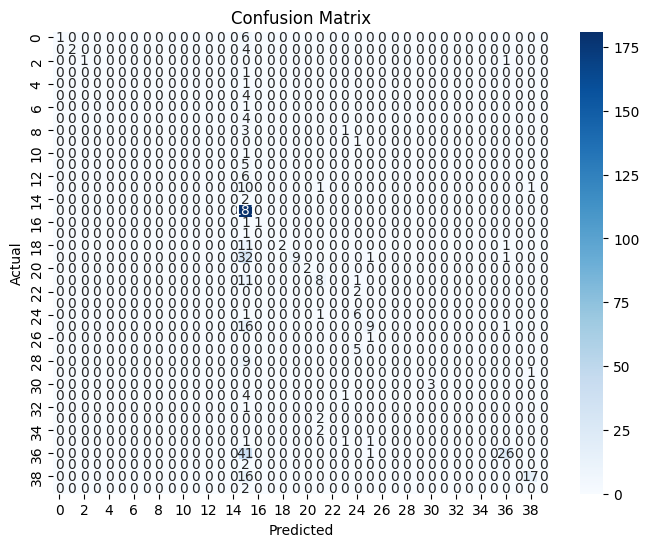

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 💾 Step 6: Save the Model
We will save the trained pipeline using **joblib** so it can be used in 
our **backend (Flask)** or **frontend (React.js via API)**.  


In [10]:
import joblib

# Save model
joblib.dump(model, "expense_model.pkl")

print("Model saved as expense_model.pkl")


Model saved as expense_model.pkl
